https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/

In [1]:
import pandas as pd

In [2]:
# Load local .csv file as DataFrame
df = pd.read_csv('TSLA.csv')

# Inspect the data
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29    3.800000    5.000000    3.508000    4.778000    4.778000   
1     2010-06-30    5.158000    6.084000    4.660000    4.766000    4.766000   
2     2010-07-01    5.000000    5.184000    4.054000    4.392000    4.392000   
3     2010-07-02    4.600000    4.620000    3.742000    3.840000    3.840000   
4     2010-07-06    4.000000    4.000000    3.166000    3.222000    3.222000   
...          ...         ...         ...         ...         ...         ...   
2807  2021-08-23  685.440002  712.130005  680.750000  706.299988  706.299988   
2808  2021-08-24  710.679993  715.219971  702.640015  708.489990  708.489990   
2809  2021-08-25  707.030029  716.969971  704.000000  711.200012  711.200012   
2810  2021-08-26  708.309998  715.400024  697.619995  701.159973  701.159973   
2811  2021-08-27  705.000000  715.000000  702.099976  711.919983  711.919983   

        Volume  
0     93831500  
1    

In [3]:
# Show some summary statistics
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  2812.000000  2812.000000  2812.000000  2812.000000  2812.000000   
mean     98.088596   100.162695    95.849960    98.124927    98.124927   
std     175.755244   179.486041   171.574275   175.787187   175.787187   
min       3.228000     3.326000     2.996000     3.160000     3.160000   
25%       8.808500     9.218500     8.762000     9.034500     9.034500   
50%      45.712000    46.303999    44.904001    45.659999    45.659999   
75%      63.989000    65.259001    62.975001    64.256498    64.256498   
max     891.380005   900.400024   871.599976   883.090027   883.090027   

             Volume  
count  2.812000e+03  
mean   3.160907e+07  
std    2.857786e+07  
min    5.925000e+05  
25%    1.232475e+07  
50%    2.513400e+07  
75%    4.051612e+07  
max    3.046940e+08  


In [4]:
# Reindex data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

# Keep on the 'Adj Close' Value
df = df[['Adj Close']]

# Re-inspect data
print(df)

             Adj Close
Date                  
2010-06-29    4.778000
2010-06-30    4.766000
2010-07-01    4.392000
2010-07-02    3.840000
2010-07-06    3.222000
...                ...
2021-08-23  706.299988
2021-08-24  708.489990
2021-08-25  711.200012
2021-08-26  701.159973
2021-08-27  711.919983

[2812 rows x 1 columns]


In [5]:
# Print Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2812 entries, 2010-06-29 to 2021-08-27
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2812 non-null   float64
dtypes: float64(1)
memory usage: 43.9 KB
None


In [6]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

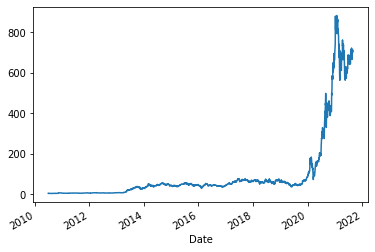

In [7]:
df['Adj Close'].plot()

In [8]:
import pandas_ta

In [9]:
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df.ta.ema(close='Adj Close', length=10, append=True)

# Inspect Data once again
print(df)

             Adj Close      EMA_10
Date                              
2010-06-29    4.778000         NaN
2010-06-30    4.766000         NaN
2010-07-01    4.392000         NaN
2010-07-02    3.840000         NaN
2010-07-06    3.222000         NaN
...                ...         ...
2021-08-23  706.299988  692.029530
2021-08-24  708.489990  695.022341
2021-08-25  711.200012  697.963736
2021-08-26  701.159973  698.544870
2021-08-27  711.919983  700.976708

[2812 rows x 2 columns]


In [10]:
print(df.head(10))

            Adj Close  EMA_10
Date                         
2010-06-29      4.778     NaN
2010-06-30      4.766     NaN
2010-07-01      4.392     NaN
2010-07-02      3.840     NaN
2010-07-06      3.222     NaN
2010-07-07      3.160     NaN
2010-07-08      3.492     NaN
2010-07-09      3.480     NaN
2010-07-12      3.410     NaN
2010-07-13      3.628  3.8168


In [11]:
# Drop the first n-rows
df = df.iloc[10:]

# View our newly-formed dataset
print(df.head(10))

            Adj Close    EMA_10
Date                           
2010-07-14      3.968  3.844291
2010-07-15      3.978  3.868602
2010-07-16      4.128  3.915765
2010-07-19      4.382  4.000535
2010-07-20      4.060  4.011347
2010-07-21      4.044  4.017284
2010-07-22      4.200  4.050505
2010-07-23      4.258  4.088231
2010-07-26      4.190  4.106735
2010-07-27      4.110  4.107328


<AxesSubplot:xlabel='Date'>

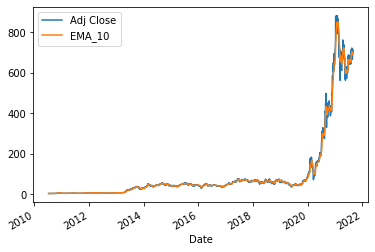

In [12]:
df.plot()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2)
# Test set
print(X_test.describe())

        Adj Close
count  561.000000
mean   100.911397
std    176.803466
min      3.520000
25%     23.563999
50%     46.194000
75%     66.737999
max    864.159973


In [15]:
# Training set
print(X_train.describe())

         Adj Close
count  2241.000000
mean     97.848207
std     175.845304
min       3.664000
25%       9.118000
50%      45.490002
75%      63.493999
max     883.090027


In [16]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.98778596]]


NameError: name 'y_pred' is not defined